In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("C:\\Users\\Kagero\\PycharmProjects\\codved intern\\Gallstone\\Gallstone_csv.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

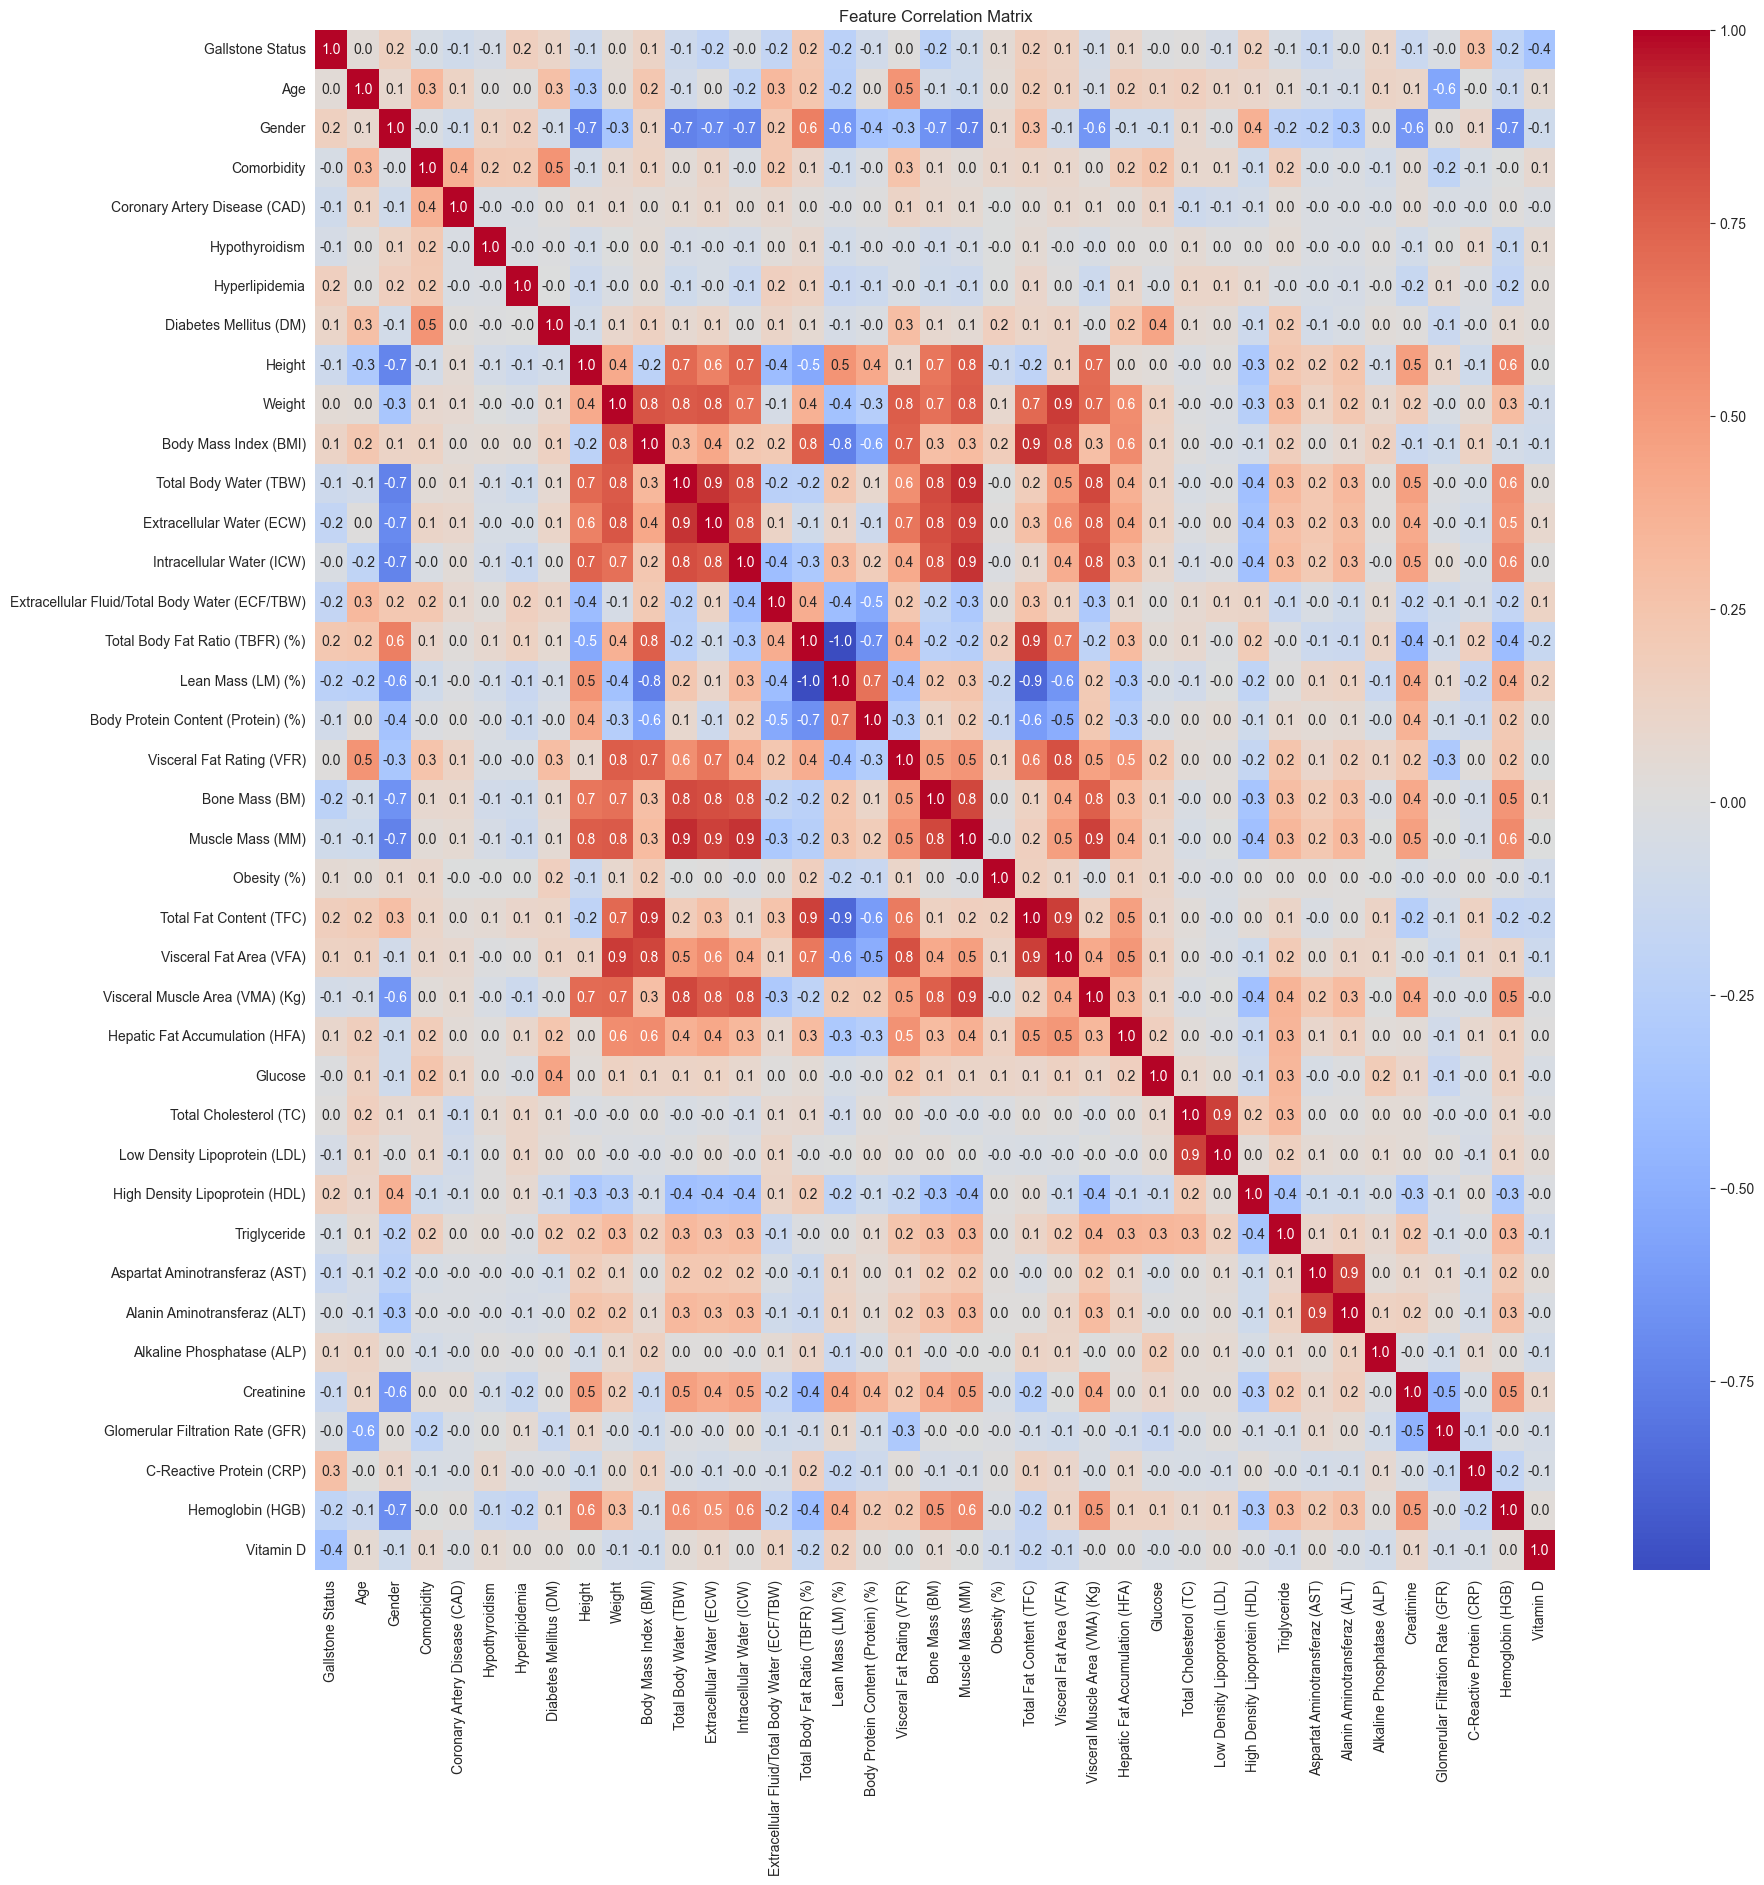

In [4]:
correlation_matrix = data.corr(numeric_only=True)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Feature Correlation Matrix')
plt.show()

In [5]:
feature_names = list(data.columns)
feature_names.pop(0)
print(feature_names)

['Age', 'Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Height', 'Weight', 'Body Mass Index (BMI)', 'Total Body Water (TBW)', 'Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)', 'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)', 'Visceral Muscle Area (VMA) (Kg)', 'Hepatic Fat Accumulation (HFA)', 'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'Glomerular Filtration Rate (GFR)', 'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)', 'Vitamin D']


In [6]:
X = np.array(data)[:, 1:]
Y = np.array(data.iloc[:, 0])
print(X.shape, Y.shape)

(319, 38) (319,)


In [7]:
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
clf_linear = SVC(kernel='linear',probability=True,random_state=42)
clf_linear.fit(x_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [10]:
predictions_linear = clf_linear.predict(x_test)
print(predictions_linear)

[1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1
 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0]


In [11]:
print(classification_report(y_test, predictions_linear))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82        33
           1       0.85      0.71      0.77        31

    accuracy                           0.80        64
   macro avg       0.80      0.79      0.79        64
weighted avg       0.80      0.80      0.80        64



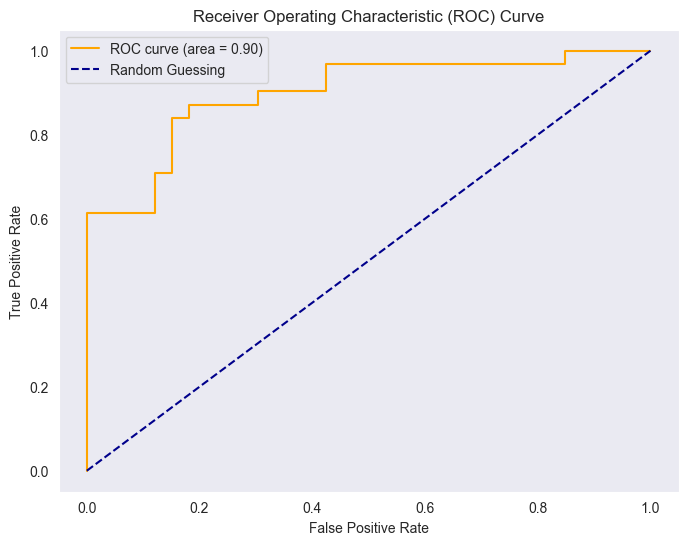

In [12]:
y_pred_proba = clf_linear.predict_proba(x_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

In [13]:
feature1 = 'Age'
feature2 = 'Body Mass Index (BMI)'

In [14]:
feature1_index = feature_names.index(feature1)
feature2_index = feature_names.index(feature2)

In [15]:
x_min, x_max = x_train[:, feature1_index].min() - 1, x_train[:, feature1_index].max() + 1
y_min, y_max = x_train[:, feature2_index].min() - 1, x_train[:, feature2_index].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [16]:
grid_template = np.mean(x_train, axis=0)
grid_to_predict = []
for f1_val, f2_val in zip(xx.ravel(), yy.ravel()):
    point = grid_template.copy()
    point[feature1_index] = f1_val
    point[feature2_index] = f2_val
    grid_to_predict.append(point)

In [17]:
grid_to_predict = np.array(grid_to_predict)
Z = clf_linear.predict(grid_to_predict)
Z = Z.reshape(xx.shape)

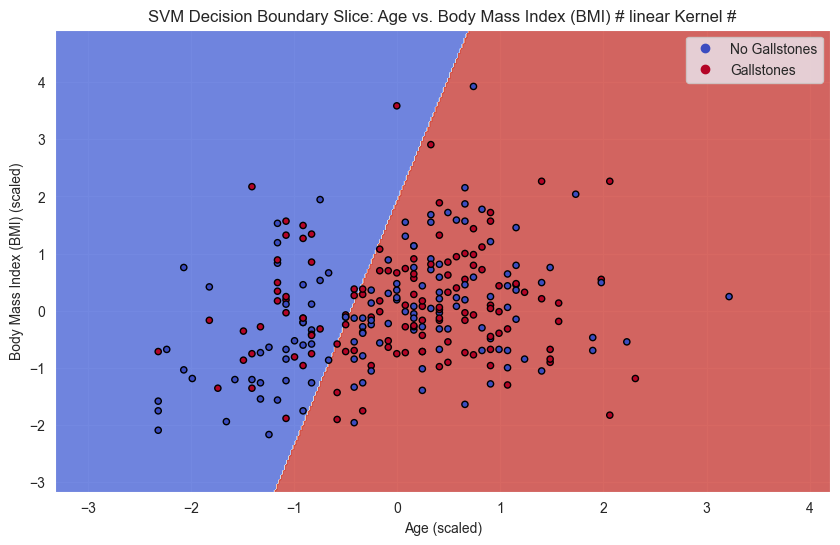

In [18]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
scatter = plt.scatter(x_train[:, feature1_index], x_train[:, feature2_index], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', s=20)
plt.xlabel(f'{feature1} (scaled)')
plt.ylabel(f'{feature2} (scaled)')
plt.title(f'SVM Decision Boundary Slice: {feature1} vs. {feature2} # linear Kernel #')
plt.legend(handles=scatter.legend_elements()[0], labels=['No Gallstones', 'Gallstones'])
plt.show()

In [19]:
clf_rbf = SVC(kernel='rbf',probability=True, random_state=42)
clf_rbf.fit(x_train, y_train)

SVC(probability=True, random_state=42)

In [20]:
predictions_rbf = clf_rbf.predict(x_test)
print(predictions_rbf)

[0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]


In [21]:
print(classification_report(y_test, predictions_rbf))

              precision    recall  f1-score   support

           0       0.71      0.88      0.78        33
           1       0.83      0.61      0.70        31

    accuracy                           0.75        64
   macro avg       0.77      0.75      0.74        64
weighted avg       0.76      0.75      0.74        64



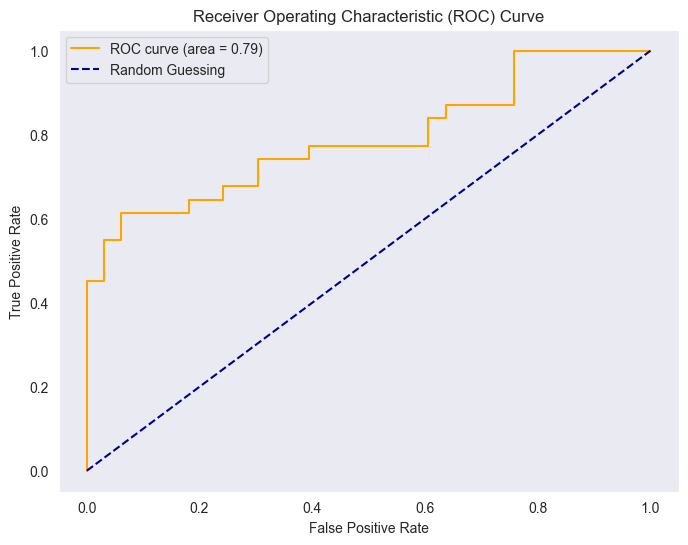

In [22]:
y_pred_proba = clf_rbf.predict_proba(x_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

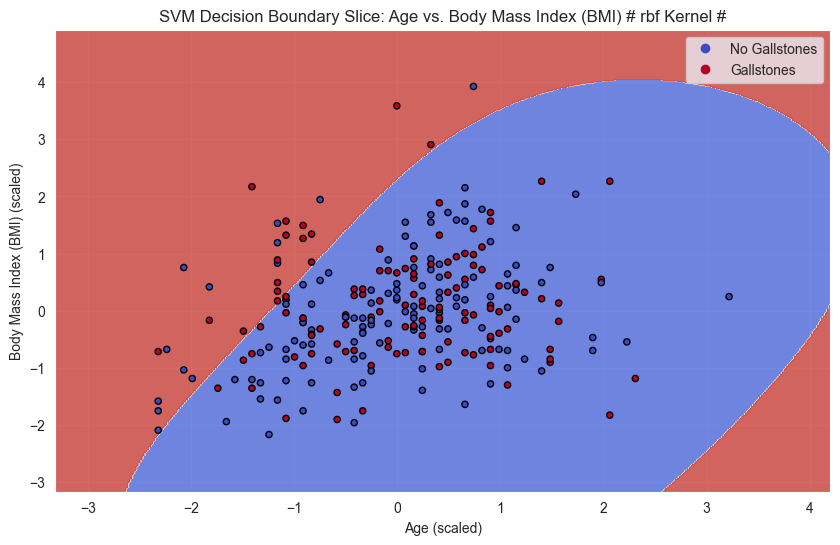

In [23]:
Z = clf_rbf.predict(grid_to_predict)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
scatter = plt.scatter(x_train[:, feature1_index], x_train[:, feature2_index], c=y_train, cmap=plt.cm.coolwarm,
                      edgecolors='k', s=20)
plt.xlabel(f'{feature1} (scaled)')
plt.ylabel(f'{feature2} (scaled)')
plt.title(f'SVM Decision Boundary Slice: {feature1} vs. {feature2} # rbf Kernel #')
plt.legend(handles=scatter.legend_elements()[0], labels=['No Gallstones', 'Gallstones'])
plt.show()